# Introducción al Aprendizaje por Refuerzos

* Introducción
* Librería OpenAI Gym
* Evaluación del rendimiento en un algoritmo de RL
* Híper-parámetros en RL

5to año - Ingeniería en Sistemas de Información

Facultad Regional Villa María

## Introducción

RL, informalmente y a fines prácticos, es una forma de aprendizaje que guía la búsqueda (con parte estocástica) de las acciones para que las mismas tiendan a converger en aquellas que maximicen la recompensa recibida.

En la presente clase vamos a introducir algunas de las herramientas disponibles para trabajar con aprendizaje por refuerzos (RL). A nivel de implementación, a diferencia de lo que sucede con el aprendizaje supervisado y no supervisado, RL resulta más complejo porque su implementación depende mucho del dominio del problema.

Esto se debe a que en RL no realizamos el aprendizaje a partir de datasets fijos sino por medio de la interacción con el entorno, el cual puede ser real o simulado. El "dataset" en RL lo obtenemos a partir de las trazas de ejecución

$$T_0 = (s_{00}, a_{00}, r_{01}, s_{01}, a_{01}, \dots, r_{0t}, s_{0t})$$
$$T_1 = (s_{10}, a_{10}, r_{11}, s_{11}, a_{11}, \dots, r_{1r}, s_{1r})$$
$$\dots$$
$$T_N = (\dots)$$



En un problema de RL dado, el entorno puede ser real (en donde las acciones impactan directamente en un sistema real) o bien simulado (en donde el entorno está bajo el control de quién simula).

Para entornos simulados, existen una serie de librerías tanto de entornos como de agentes que nos permiten empezar a entrenar nuestros algoritmos de arranque.

## Ejemplo: Librería OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) (Brockman et. al., 2016) es una librería de OpenAI que ofrece entornos y una interfaz estándar con la cuál probar nuestros agentes. Su objetivo es proveer benchmarks unificados para ver el desempeño de algoritmos en el entorno y así poder saber con facilidad cómo es su desempeño comparado con los demás. Parte de la siguiente sección está basada en la documentación oficial de OpenAI.

Vamos a instalar el gym...

In [1]:
# vamos a instalar el gym

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain

from IPython.display import clear_output

pipmain(['install', 'gym'])
clear_output()

La interfaz principal de los ambientes de gym es la interfaz Env. La misma posee tres métodos principales (info. basada en la documentación oficial de Gym):


    reset(self): Reinicia el estado del entorno, a su estado inicial, devolviendo una observación de dicho estado.
    step(self, action): "Avanza" un timestep del ambiente. Devuelve: observation, reward, done, info.
    render(self): Muestra en pantalla una parte del ambiente.
    close(self): Finaliza con la instancia del agente.
    seed(self): Establece la semilla aleatoria del generador de números aleatorios del presente entorno.


Por otra parte, cada entorno posee los siguientes tres atributos principales:

    action_space: El objeto de tipo Space correspondiente al espacio de acciones válidas.
    observation_space: El objeto de tipo Space correspondiente a todos los rangos posibles de observaciones.
    reward_range: Tupla que contiene los valores mínimo y máximo de recompensa posible.

Nota: antes de poder ver video instalar la dependencia ffmpeg. En Linux esto se hace mediante el comando

    sudo apt-get install ffmpeg

In [2]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # se ejecuta una acción aleatoria
    if done:
        env.reset()
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
clear_output()
env = gym.make('MountainCar-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
clear_output()

In [4]:
print(env.action_space)

Discrete(3)


## Evaluación del rendimiento en un algoritmo de RL

A diferencia de lo que sucede en el aprendizaje supervisado, en el aprendizaje por refuerzos el rendimiento se evalúa por una función específica que es la función de recompensa. En la práctica, la función de recompensa puede ser externa (y proveer desde el entorno) o bien puede ser una función creada por diseño (a modo de dirigir el agente hacia lo que por diseño se considera mejor) o bien combinar ambos enfoques (usando recompensas obtenidas desde el entorno y generadas por diseño).

Como el objetivo de RL es maximizar la recompensa obtenida, es posible utilizar la información sobre la obtención de la recompensas en cada time-step o episodio para evaluar el rendimiento parcial del agente (esto depende mucho de la particularidad de la distribución de la recompensa para el problema tratado).

Ejemplo:

![Example](images/rl_convergence_example.png)

## Híper-parámetros de RL

Los algoritmos de RL, al igual que como sucede con las demás técnicas de ML, poseen híper-parámetros $\theta$ (no confundir con $\theta$ usado para denotar el umbral de decisión en la clasificación) que regulan la forma en la que se realiza el aprendizaje. En RL en particular, de $\theta$ **depende la generación de los datos**, y los mismos sesgan de tal forma la ejecución que la mayoría de las veces no es posible comparar las distintas trazas generadas con distintos $\theta$.

Optimizar los híper-parámetros $\theta$ en algoritmos de RL es un desafío considerable, debido a que de los mismos **depende la generación de los datos**, y los híper-parámetros sesgan de tal forma la ejecución que la mayoría de las veces no es posible comparar las distintas trazas generadas con distintos $\theta$.

En contrapartida, en el aprendizaje supervisado y no supervisado, al aplicar un algoritmo de ML los datos ya están generados de antemano, siendo el algoritmo (informalmente) una forma de obtener conocimiento a partir de los datos crudos.

Si además también consideramos que en RL, la generación de una traza es algo computacionalmente costoso (excepto en ejemplos pequeños como el mostrado en esta clase), la selección de $\theta$ debe hacerse muy cuidadosamente. En la práctica suele hacerse manualmente o bien alguna variante de random search (grid search cuando el ejemplo es computacionalmente demandante es inviable).

El gran problema de ambos métodos es que actualmente no existe un esquema formal para aprovechar el conocimiento adquirido de los $\theta$ descartados, quedando la optimización sujeta a prueba y error o reglas empíricas. En RL particularmente esto no es un dato menor, porque al ser tan sensibles los modelos a sus híper-parámetros, una nueva simulación con un ligero cambio de éstos puede generar resultados totalmente distintos.

[Ejemplo de algoritmo propuesto para optimización de híper-parámetros en RL (por los docentes de la cátedra)](https://arxiv.org/pdf/1805.04748)

## Trabajo práctico 6

Para el presente trabajo práctico vamos a utilizar la clase CartPoleTabularAgent, llamadas desde el presente notebook, y el script *cartpole_main_script*. Los mismos se presentan como herramientas para resolver los ejercicios, por lo se permite, para la resolución de los mismos, modificarlas o reemplazarlas por sus propias implementaciones. Las clases presentan la siguiente funcionalidad:

> cartpole_main_script

Script que crea y define la configuración inicial del agente de RL de tipo CartPole, creando la instancia de CartPoleTabularAgent.

> CartPoleTabularAgent

Clase que implementa la interfaz con OpenAIGym, creando el entorno e iterando el mismo. Adicionalmente provee una interfaz para llamar y correr el agente RL. La clase adicionalmente le realiza un pre-procesamiento a las observaciones del entorno: puesto que las mismas son continuas, el espacio de estados es discretizado con respecto a atributos tales como la posición en la que se encuentra el carro y su ángulo.

Adicionalmente, en la clase también se implementa el algoritmo QLearning, lo cual involucra el guardado de los valores de Q en un diccionario, la selección de acciones (mediante $choose\_action$) y la actualización de los valores de Q (mediante $learn$).


### Ejercicios Básicos

1. Graficar una curva de convergencia para mostrar cómo el algoritmo va realizando sucesivamente su aprendizaje (por ejemplo mostrando la recompensa promedio por episodio). Si la convergencia en la curva no es clara (por ejemplo porque salta constantemente en el rango de valores), debe de alguna forma suavisarse (por ejemplo al dividirla en 10 segmentos y promediar el valor de recompensa en los mismos).
2. Implementar un algoritmo que cambie la política de $\epsilon$-greedy a Softmax, es decir que para todo estado $s$ y toda acción $a$, la probabilidad de elegir la acción $a$ debe estar dada por
$$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$
3. Probar con distintas configuraciones de híper-parámetros (ejemplo: gamma, la cantidad de divisiones de la posición del carro, entre otros) y comentar cómo las mismas cambian la convergencia del agente (tal prueba puede también realizarse mediante una optimización de híper-parámetros estilo Grid Search o Random Search).

### Ejercicios Complementarios

1. Implementar algoritmo $SARSA$.
2. Implementar $Q(\lambda)$ o $SARSA(\lambda)$.
3. Comparar los algoritmos implementados en cuanto a la curva de convergencia planteada en el Ej. Básico 1.

### Ejercicios Extra

1. En el Ejercicio Complementario 2, implementar tanto $Q(\lambda)$ como $SARSA(\lambda)$ e incluir ambos en la comparación gráfica.

### Links adicionales para aquellos interesados

* [Próximamente: OpenAI libera detalles de su algoritmo de RL para Dota 2 con el que enfrentará a profesionales en The International](https://blog.openai.com/openai-five/)
	- [Actualización: primera serie de partidos pre-The International finalizada](https://blog.openai.com/openai-five-benchmark-results/)
* [Curso de Deep Reinforcement Learning que incluye juegos Doom y Mario Bros](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)
* [Paper Human-Level Control through Deep Reinforcement Learning (RL para juegos de Atari)](https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf) y su [implementación en Python](https://github.com/devsisters/DQN-tensorflow)
* [Tutorial para entrenar agentes de DeepRL en StarCraft II](http://chris-chris.ai/2017/08/30/pysc2-tutorial1/)
* [Buena librería de agentes de RL](http://ray.readthedocs.io/en/latest/rllib.html)



Fecha de entrega: **6/7/2018 23:55**

Nota: la resolución de los ejercicios es **individual**. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

**Recomendación**: No se sugiere hacer este TP desde jupyter notebook sino desde un IDE estilo Pycharm, debido a que los algoritmos de RL suelen requerir un debug paso a paso, tanto para corregir errores como para entender mejor cómo funcionan los mismos.

Código de llamado a la interfaz de CartPoleTabularAgent (el mismo código se encuentra en el script *cartpole_main_script*)

In [5]:
import numpy as np
import cart_pole_tabular_agent.CartPoleTabularAgent as cP

# se declara una semilla aleatoria
random_state = np.random.RandomState(20)

# el tiempo de corte del agente son 200 time-steps (el cual es el máximo del entorno Cartpole; seguir iterando tras 200
# no cambiará el entorno)
cutoff_time = 200

# instanciamos nuestro agente
agent = cP.CartPoleTabularAgent()
agent.random_state = random_state

# definimos sus híper-parámetros básicos
# (también podrían establecerse los bins que hacen la división, modificando el método set_hyper_parameters)

agent.set_hyper_parameters({"alpha": 0.5, "gamma": 0.9, "epsilon": 0.1})

# declaramos como True la variable de mostrar video, para ver en tiempo real cómo aprende el agente. Borrar esta línea
# para acelerar la velocidad del aprendizaje
agent.display_video = True

# establece el tiempo de
agent.set_cutoff_time(cutoff_time)

# inicializa el agente
agent.init_agent()

# reinicializa el conocimiento del agente
agent.restart_agent_learning()

# run corre el agente devuelve el overall score, que es el promedio de recompensa de todos los episodios
overall_score = agent.run()
agent.destroy_agent()

clear_output()

# Apéndice A: Ejemplo de Q-Learning en agente FrozenLake (con slippery = False)

Nota: el siguiente contenido es un material extra orientado a una comprensión más profunda de los algoritmos de aprendizaje por refuerzos, siendo un contenido extra al práctico dictado en la cátedra durante el año 2018.

![Frozen Lake](images/frozen_lake.png)

donde S= starting point (safe), F= frozen surface (safe), H=hole (fall to your doom), G= goal (where the frisbee is located)

(imagen de https://www.analyticsindiamag.com/openai-gym-frozen-lake-beginners-guide-reinforcement-learning/)

Descripción del entorno:

Acciones:

* ^ - Arriba
* v - Abajo
* \> - Derecha
* < - Izquierda

Función de recompensa:

* $+1$ por llegar a estado Goal
* $0$ en todos los demás estados


Función de transición:

* Con el atributo slippery en False cada acción mueve el agente en tal sentido con una probabilidad del 100,0%. Con slippery en True, el 66,6% de las veces el agente se moverá a la casilla deseada, mientras que el 33,3% de las veces el agente se moverá a otra posición, determinada aleatoriamente.


Nota: slippery es un atributo en el entorno FrozenLake que hace que el hielo sea o no resbaladizo, haciendo que el 33% de las veces la acción ejecutada sea aleatoria. En el agente implementado de este notebook el mismo se desactivó para poder analizar mejor el desempeño del agente.

### Ejecución de agente aleatorio en FrozenLake

In [7]:
import time

env = gym.make('FrozenLake-v0')
env.reset()
for _ in range(10):
    clear_output()
    env.render()
    time.sleep(1)
    observation, reward, done, info = env.step(env.action_space.sample()) # se ejecuta una acción aleatoria
    if done:
        env.reset()
env.close()

  (Up)
SFFF
FHFH
FFFH
HFFG


### Configuración básica

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from frozen_lake_agent import FrozenLakeAgent as fP
import itertools

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 0.9
epsilon = 0.1
tau = 25
is_slippery = False
cutoff_time = 100  # el tiempo de corte del agente son 100 time-steps, por lo que mantenemos el máximo (es posible bajarlo)

# se declara una semilla aleatoria
random_state = np.random.RandomState(20)

# instanciamos nuestro agente
agent = fP.FrozenLakeAgent()
agent.random_state = random_state

agent.set_hyper_parameters({"alpha": alpha, "gamma": gamma, "epsilon": epsilon})

# declaramos como True la variable de mostrar video, para ver en tiempo real cómo aprende el agente. Borrar esta línea
# para acelerar la velocidad del aprendizaje
agent.display_video = True

# establece el tiempo de
agent.set_cutoff_time(cutoff_time)

### Inicialización y ejecución del agente

In [10]:
# inicializa el agente
agent.init_agent(is_slippery=is_slippery)  # slippery es establecido en False por defecto

# reinicializa el conocimiento del agente
agent.restart_agent_learning()

# se realiza la ejecución del agente
avg_steps_per_episode = agent.run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

A diferencia de lo que sucede en el aprendizaje supervisado, en el aprendizaje por refuerzos el rendimiento se evalúa por una función específica que es la función de recompensa. En la práctica, la función de recompensa puede ser externa (y proveer desde el entorno) o bien puede ser una función creada por diseño (a modo de dirigir el agente hacia lo que por diseño se considera mejor, en nuestro ejemplo podría ser con una recompensa de $-1$ cada vez que el agente llega a un estado H) o bien combinar ambos enfoques (usando recompensas obtenidas desde el entorno y generadas por diseño).

Como el objetivo de RL es maximizar la recompensa obtenida, es posible utilizar la información sobre la obtención de la recompensas en cada time-step o episodio para evaluar el rendimiento parcial del agente (esto depende mucho de la particularidad de la distribución de la recompensa para el problema tratado).

Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos aspectos:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente en cada uno de los episodios. Con esta medida sabremos al instante si el agente pudo llegar al estado Goal en cada uno de los episodios, habiendo recibido una recompensa de $1$, donde en caso contrario habrá recibido una recompensa de $0$.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio. Si bien este indicador no garantiza que el agente haya llegado al estado G, indicará cómo el mismo tiende a realizar su aprendizaje (si aprende debería tender a bajar la cantidad de pasos por cada episodio).

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $0$ excepto en aquellos en los que se arriba al estado Goal, donde la recompensa es de $1$)

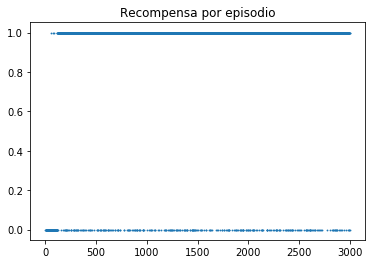

In [11]:
episode_rewards = np.array(agent.reward_of_episode)
plt.scatter(np.array(range(0, len(episode_rewards))), episode_rewards, s=0.7)
plt.title('Recompensa por episodio')
plt.show()

Veamos pasos por episodio

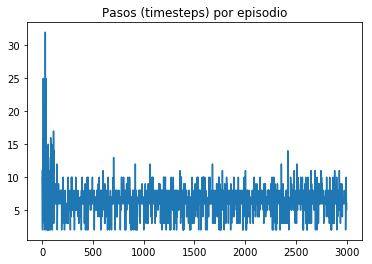

In [12]:
# se muestra la curva de aprendizaje de los pasos por episodio
episode_steps = np.array(agent.timesteps_of_episode)
plt.plot(np.array(range(0, len(episode_steps))), episode_steps)
plt.title('Pasos (timesteps) por episodio')
plt.show()

Como vemos, los gráficos arrojan algo de información pero a su vez oscilan demasiado. Para contrarrestar esto procedemos a suavizarlos:

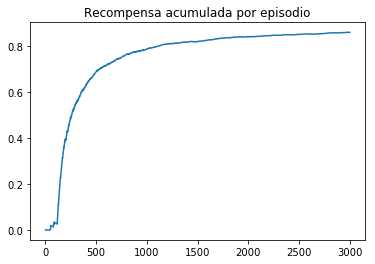

In [13]:
# se suaviza la curva de convergencia
episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
acumulated_rewards = np.cumsum(episode_rewards)

reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]

plt.plot(reward_per_episode)
plt.title('Recompensa acumulada por episodio')
plt.show()

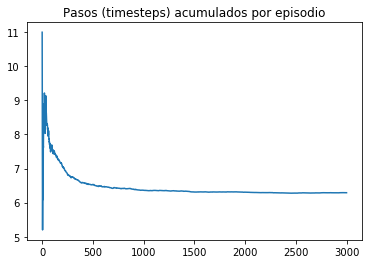

In [14]:
# se suaviza la curva de aprendizaje
episode_number = np.linspace(1, len(episode_steps) + 1, len(episode_steps) + 1)
acumulated_steps = np.cumsum(episode_steps)

steps_per_episode = [acumulated_steps[i] / episode_number[i] for i in range(len(acumulated_steps))]

plt.plot(steps_per_episode)
plt.title('Pasos (timesteps) acumulados por episodio')
plt.show()

#### Análisis de matriz de valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor que alcanzó cada estado al finalizar la ejecución del agente y la acción que ejecutaría al llegar a cada estado\*. Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Teniendo los valores de $Q(s,a)$ para cada par estado-acción, el valor de cada estado se calcula a través de

$$V(s) = \sum_{a} \pi(a \mid s) Q(s, a) $$

donde $\pi(a \mid s)$ es la probabilidad de tomar la acción $a$ siendo que el agente se encuentra en el estado $s$. Siguiendo la política $\epsilon$-greedy, donde como ejemplo $\epsilon = 0.25$, $\pi(a \mid s)$ está dado por:


$$ \pi(a \mid s) = \begin{cases}
                        0.75 + \frac{0.25}{4} & \text{si $a$ es la mejor acción}\\
                        0.25 & \text{en caso contrario}
                   \end{cases}
$$


Notar que la fracción $\frac{0.25}{4}$ se añade pues se tiene en cuenta que $a$ puede haber sido elegida aleatoriamente al ejecutar una acción exploratoria. Un criterio distinto podría ser que en la acción exploratoria se excluya a la mejor acción.


(\*) Tener en cuenta que este análisis se hace principalmente con fines educativos, para entornos más complejos el mismo puede no ser factible. En tales casos, un análisis alternativo podría consistir en hacer que el agente ejecute su política para la que fue entrenado, para hacer una evaluación a partir del comportamiento del mismo.

Por otra parte, la acción óptima para cada estado se obtiene simplemente consultando el $Q(s,a)$ que mayor valor arroja. Gráficamente:

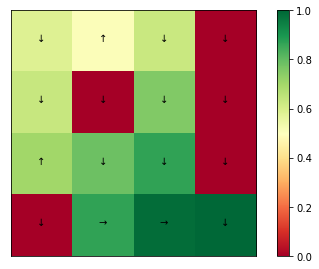


 Matriz de valor (en números): 

 [[ 0.58473272  0.51024546  0.63217969  0.        ]
 [ 0.63494077  0.          0.75642609  0.        ]
 [ 0.70548975  0.7859025   0.86895     0.        ]
 [ 0.          0.87096289  0.988       1.        ]]


In [16]:
# se procede con los cálculos previos a la graficación de la matriz de valor
value_matrix = np.zeros((4, 4))
for row in range(4):
    for column in range(4):

        state_values = []

        for action in range(4):
            state_values.append(agent.q.get((row * 4 + column, action), 0))

        maximum_value = max(state_values)  # como usamos epsilon-greedy, determinamos la acción que arroja máximo valor
        state_values.remove(maximum_value)  # removemos el ítem asociado con la acción de máximo valor

        # el valor de la matriz para la mejor acción es el máximo valor por la probabilidad de que el mismo sea elegido
        # (que es 1-epsilon por la probabilidad de explotación más 1/4 * epsilon por probabilidad de que sea elegido al
        # azar cuando se opta por una acción exploratoria)
        value_matrix[row, column] = maximum_value * (1 - epsilon + 1/4 * epsilon)

        for non_maximum_value in state_values:
            value_matrix[row, column] += epsilon/4 * non_maximum_value

# el valor del estado objetivo se asigna en 1 (reward recibido al llegar) para que se coloree de forma apropiada
value_matrix[3, 3] = 1

# se grafica la matriz de valor
plt.imshow(value_matrix, cmap=plt.cm.RdYlGn)
plt.tight_layout()
plt.colorbar()

fmt = '.2f'
thresh = value_matrix.max() / 2.
for row, column in itertools.product(range(value_matrix.shape[0]), range(value_matrix.shape[1])):

    arrow_direction = '↓'

    left_action = agent.q.get((row * 4 + column, 0), 0)
    down_action = agent.q.get((row * 4 + column, 1), 0)
    right_action = agent.q.get((row * 4 + column, 2), 0)
    up_action = agent.q.get((row * 4 + column, 3), 0)

    best_action = down_action

    if best_action < right_action:
        arrow_direction = '→'
    if best_action < left_action:
        arrow_direction = '←'
    if best_action < up_action:
        arrow_direction = '↑'

    # notar que column, row están invertidos en orden en la línea de abajo porque representan a x,y del plot
    plt.text(column, row, arrow_direction,
             horizontalalignment="center")

plt.xticks([])
plt.yticks([])
plt.show()

print('\n Matriz de valor (en números): \n\n', value_matrix)

In [17]:
# destrucción del agente
agent.destroy_agent()